In [1]:
import os
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
len_min = 3

In [3]:
disease = 'multiple_myeloma'
file_name = 'ehr-shuffle.csv'
date_time_folder = '2018-10-10-16-44-0' 

data_folder = os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease, date_time_folder))

with open(os.path.join(data_folder, file_name)) as f:
    rd = csv.reader(f)
    ehr_shuffle = {}
    sub_len = []
    for r in rd:
        sub_len.append(len(r[1::]))
        ehr_shuffle.setdefault(r[0], list()).extend(r[1::])

In [4]:
print("The average number of tokens for each time slot of N days is {0:.2f}".format(np.mean(sub_len)))

The average number of tokens for each time slot of N days is 22.77


(array([1.765e+04, 2.835e+03, 9.560e+02, 3.920e+02, 1.640e+02, 7.600e+01,
        3.300e+01, 1.500e+01, 2.000e+00, 3.000e+00]),
 array([  1. ,  33.9,  66.8,  99.7, 132.6, 165.5, 198.4, 231.3, 264.2,
        297.1, 330. ]),
 <a list of 10 Patch objects>)

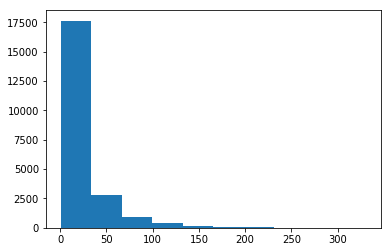

In [5]:
plt.hist(sub_len)

In [6]:
l = []
for mrn in ehr_shuffle:
    l.append(len(ehr_shuffle[mrn]))
print("The average length of ehr sequences is: {0:.2f}".format(np.mean(l)))

The average length of ehr sequences is: 57.65


In [7]:
count = 0
for ll in l:
    if ll<3:
        count += 1
print("{0} of {1} patients have less than 3 records".format(count, len(l)))

569 of 8739 patients have less than 3 records


In [8]:
print("The sequence length ranges from {0} to {1}".format(min(l), max(l)))

The sequence length ranges from 1 to 1405


(array([5.355e+03, 1.465e+03, 7.640e+02, 4.010e+02, 2.400e+02, 1.510e+02,
        8.800e+01, 7.400e+01, 5.000e+01, 3.800e+01, 2.500e+01, 1.700e+01,
        1.700e+01, 1.200e+01, 9.000e+00, 8.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e+00, 4.000e+01, 7.900e+01, 1.180e+02, 1.570e+02, 1.960e+02,
        2.350e+02, 2.740e+02, 3.130e+02, 3.520e+02, 3.910e+02, 4.300e+02,
        4.690e+02, 5.080e+02, 5.470e+02, 5.860e+02, 6.250e+02, 6.640e+02,
        7.030e+02, 7.420e+02, 7.810e+02, 8.200e+02, 8.590e+02, 8.980e+02,
        9.370e+02, 9.760e+02, 1.015e+03, 1.054e+03, 1.093e+03, 1.132e+03,
        1.171e+03, 1.210e+03, 1.249e+03, 1.288e+03, 1.327e+03, 1.366e+03,
        1.405e+03]),
 <a list of 36 Patch objects>)

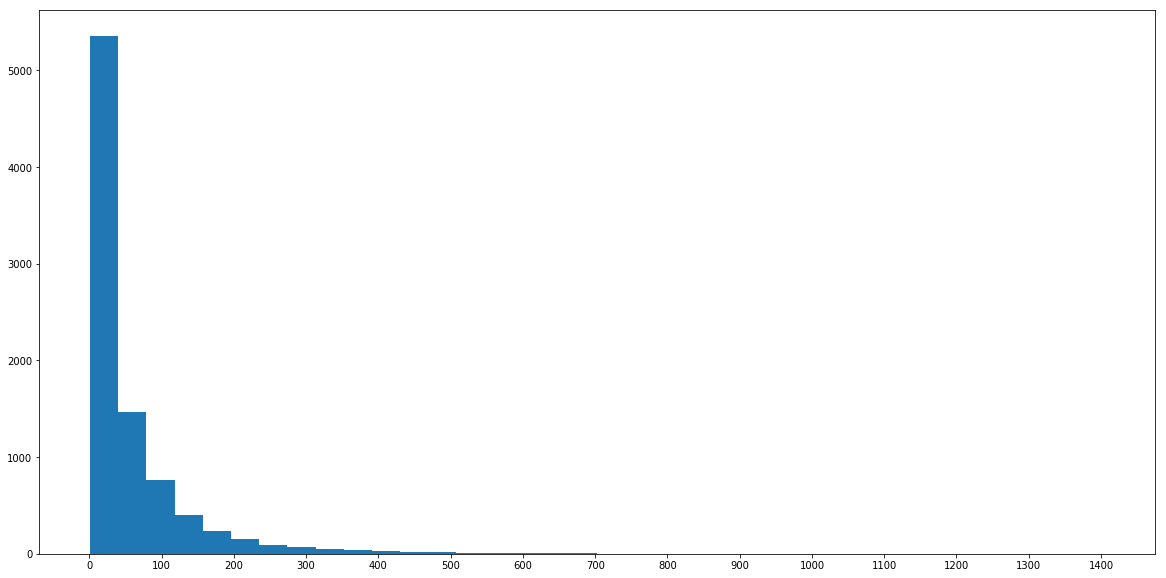

In [9]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0, max(l), 100))
plt.hist(l, bins = 36)

In [10]:
with open(os.path.join(data_folder, 'list_mrnToDrop.csv'), 'w') as f:
    wr = csv.writer(f, delimiter=',')
    discard_list = []
    for mrn in ehr_shuffle:
        if len(ehr_shuffle[mrn]) < len_min:
            discard_list.append(mrn)
    wr.writerow(discard_list)

In [11]:
print("We are dropping {0} out of {1} patients".format(len(discard_list), len(ehr_shuffle)))

We are dropping 569 out of 8739 patients
